<a href="https://colab.research.google.com/github/shakil1819/CSE442-Machine-Learning-Sessional/blob/main/Week%208%20-%20CNN%20ANN/Car_Purchase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Dataset : https://raw.githubusercontent.com/shakil1819/CSE442-Machine-Learning-Sessional/main/Week%208%20-%20CNN%20ANN/car_purchasing.csv

# Neuron Comparison
- Dendrite =Input
- Soma = cell body (Calculation)
- Axon = Receives  Results
- Axon Terminals = Info will be received by another neuron .For the 1st neuron It will be Output but for 2nd one it will be input. Like this way a network is  created from lots of neuron.


# ANN (Artificial Neural Network)
- 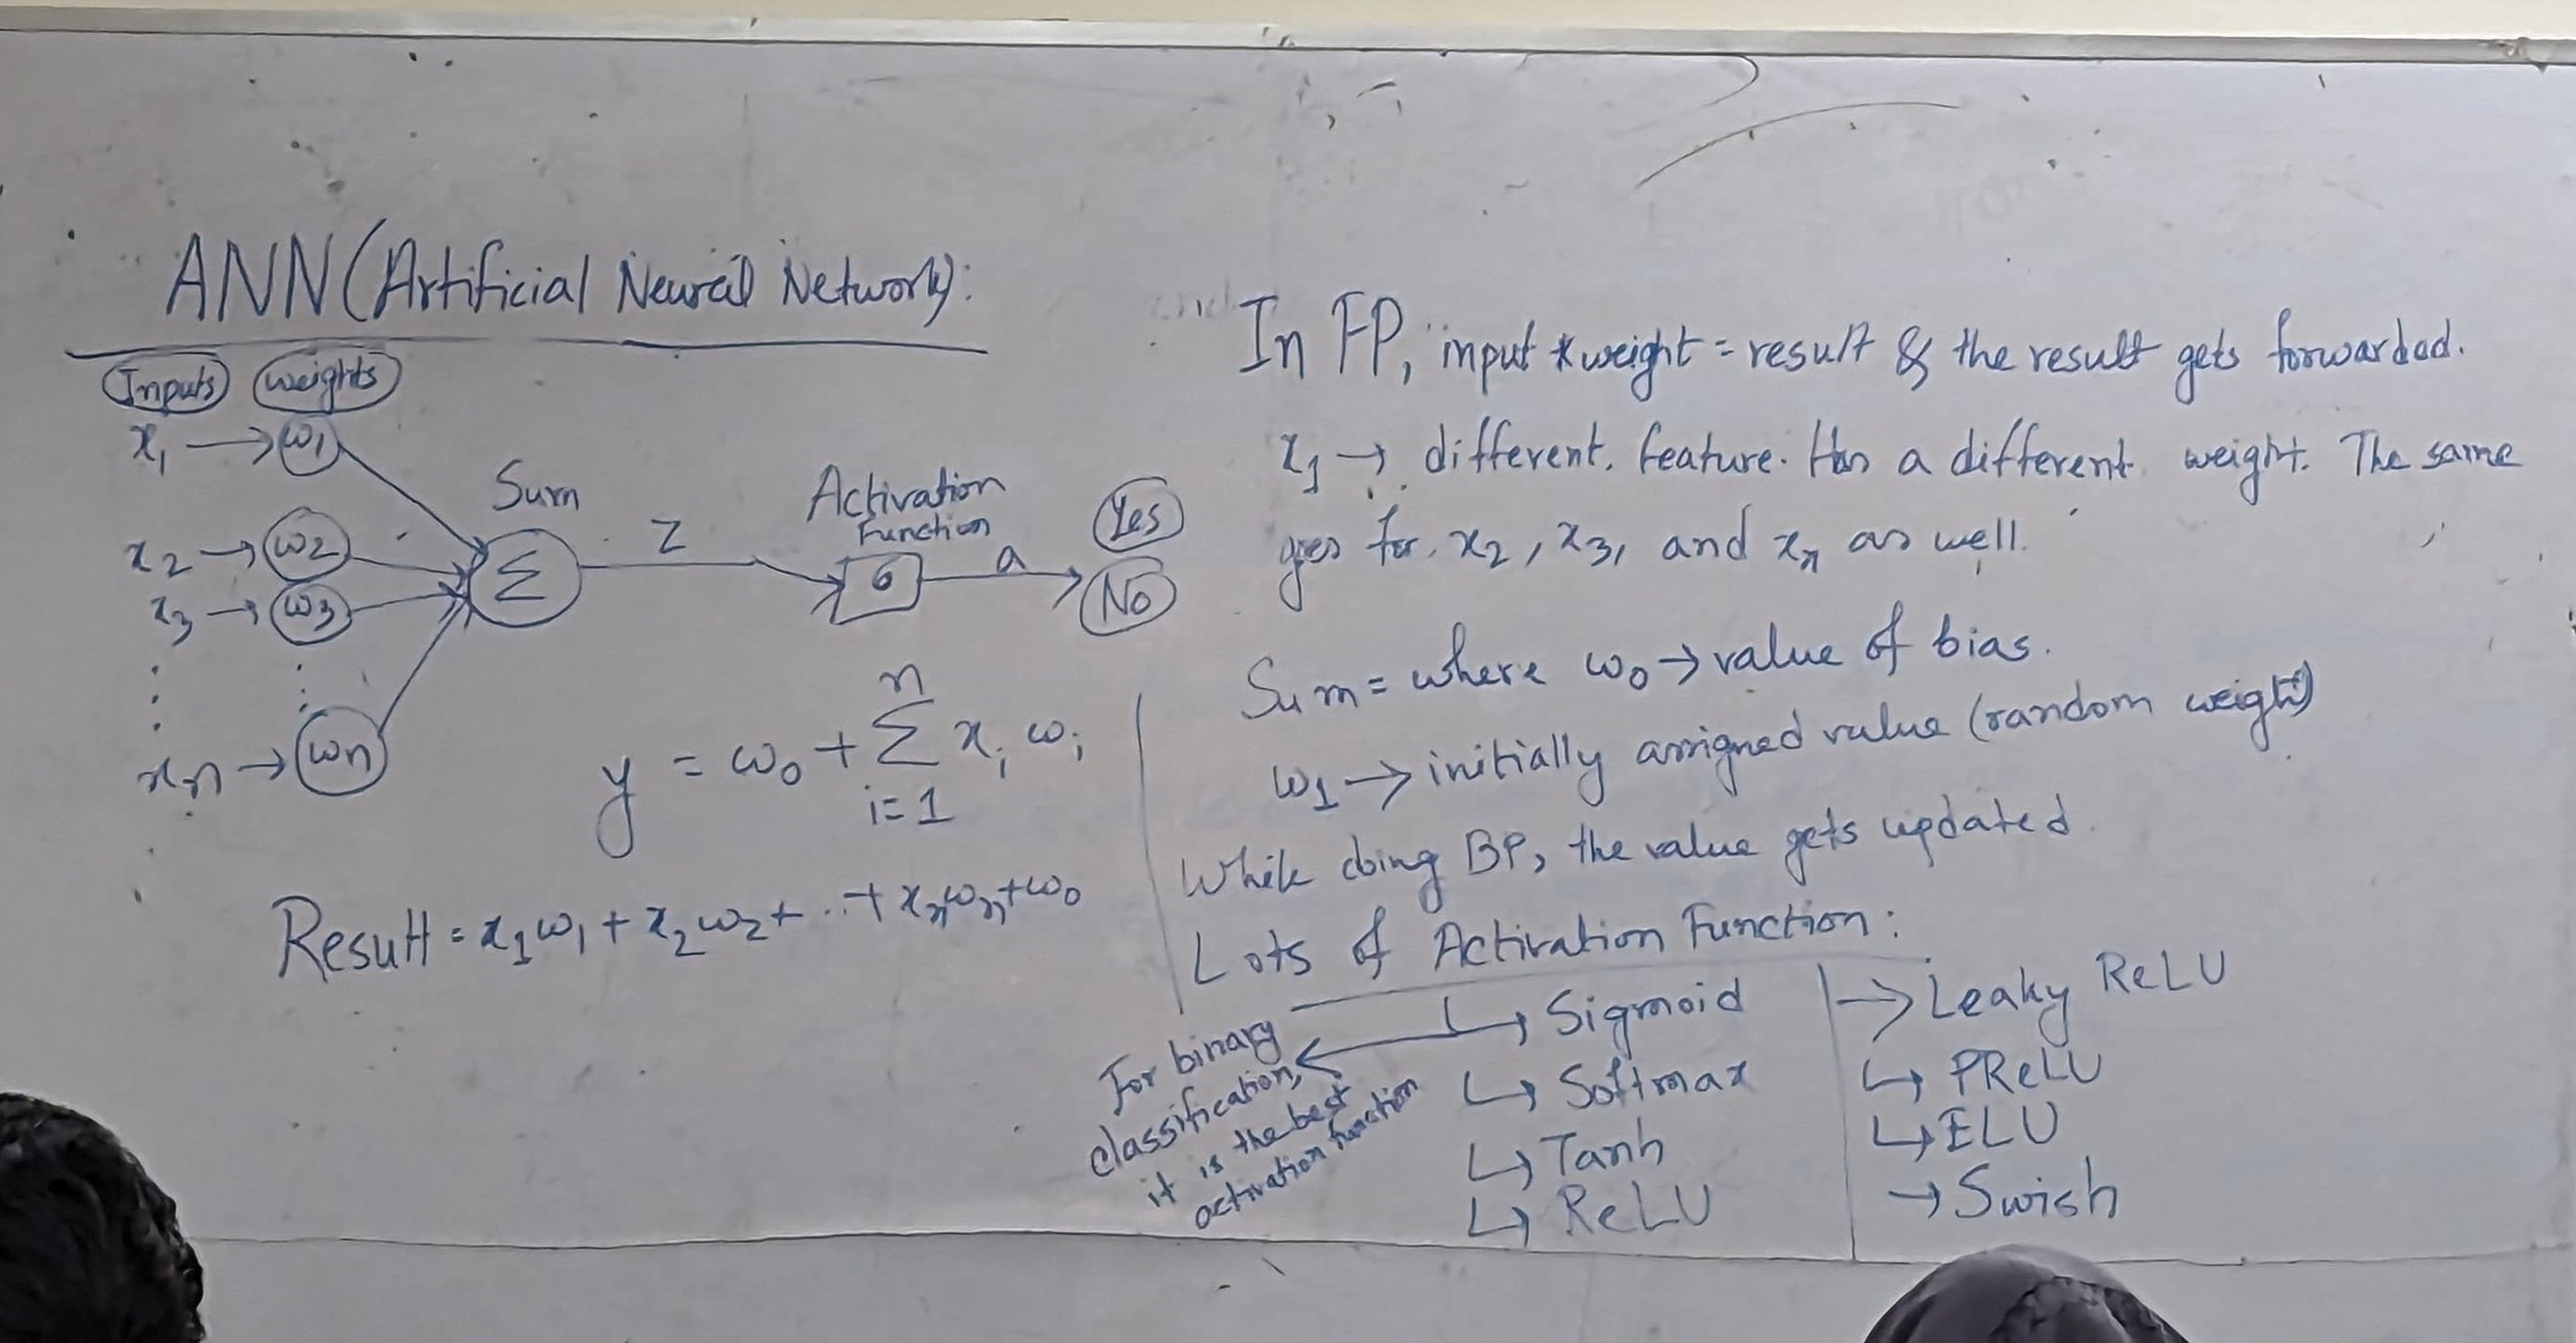

- 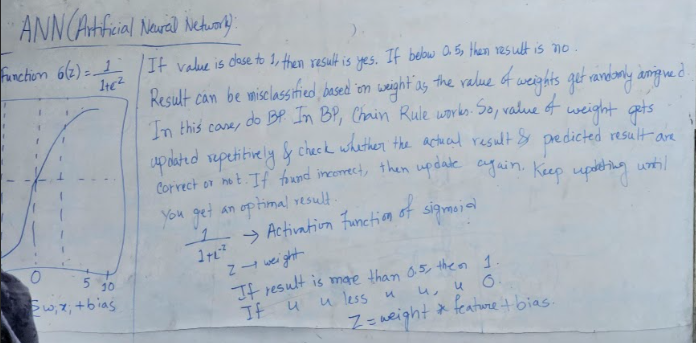


- 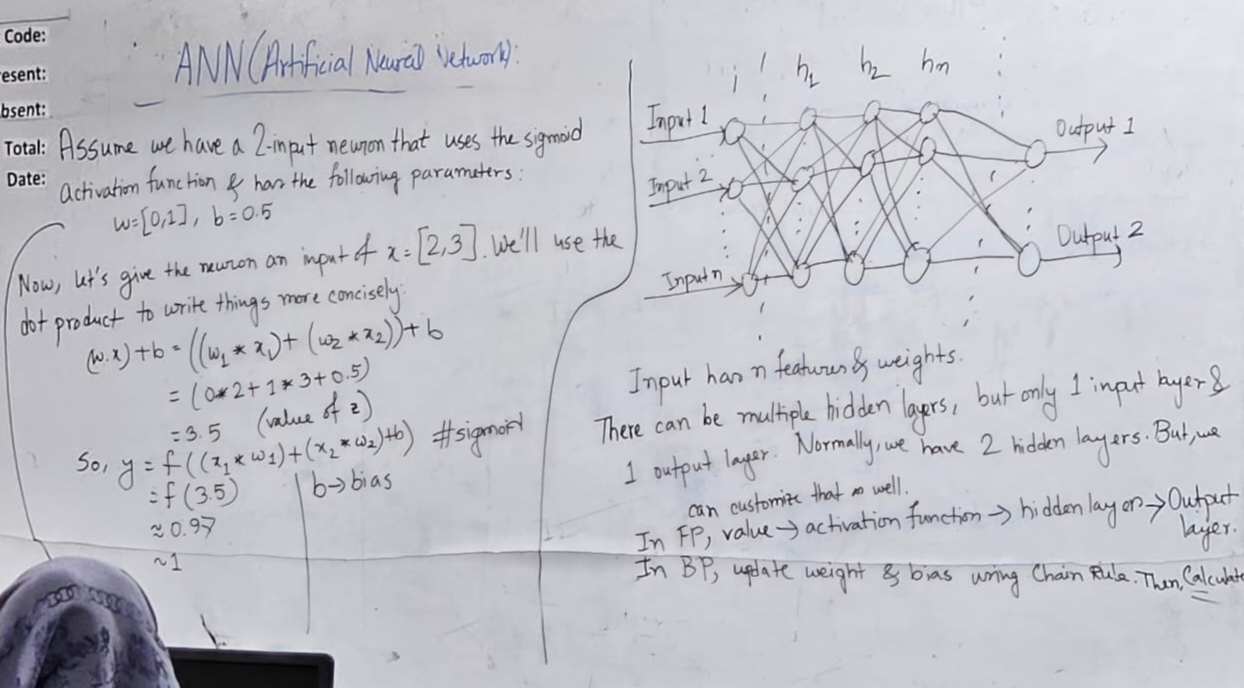

- 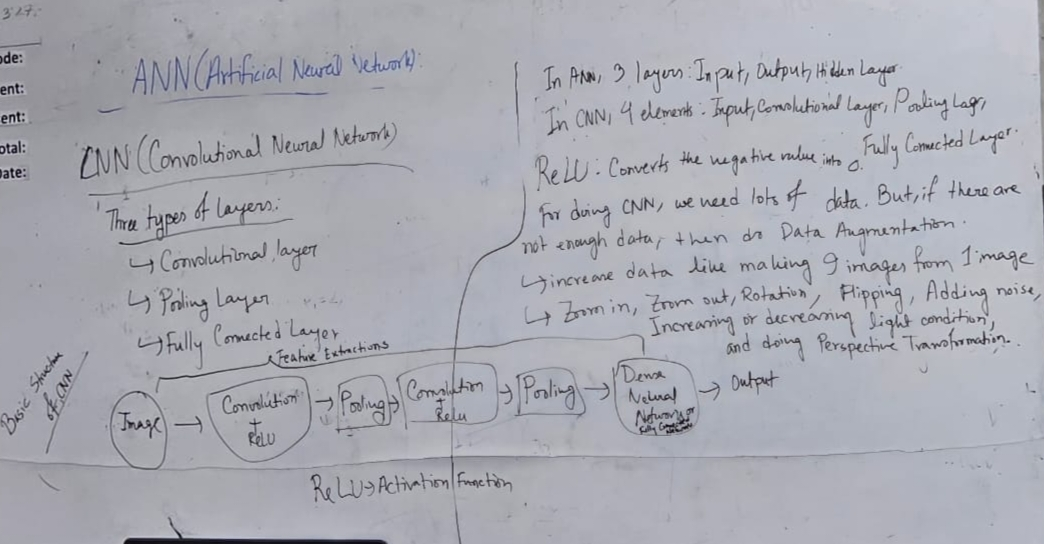

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from warnings import filterwarnings

In [ ]:
path = "https://raw.githubusercontent.com/shakil1819/CSE442-Machine-Learning-Sessional/main/Week%208%20-%20CNN%20ANN/car_purchasing.csv"
df = pd.read_csv(path , encoding='latin-1')
df.head(50)
while True:pass